# tf 데이터프레임의 각 인스턴스별로 df의 위치와의 거리(유클리디언)가 가장 가까운 인스턴스는?
## 2022.11.29 요구사항

<img src='https://images.unsplash.com/photo-1451471016731-e963a8588be8?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MjB8fG5laWdoYm9yc3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. df 생성

,lat,long
0,-1,-1
1,-2,-1
2,-3,-2
3,1,1
4,1,1
5,2,1
6,3,2


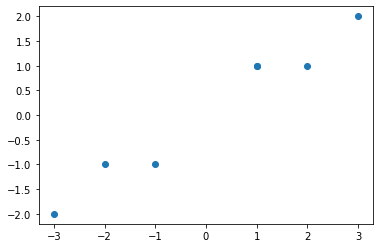

In [6]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [1,1], [2, 1], [3, 2]])
plt.scatter(X[:, 0], X[:, 1])

df = pd.DataFrame(X, columns=['lat', 'long'])
df

# 2. tf 생성

In [7]:
tf = (df*1.2).abs()
tf

,lat,long
0,1.2,1.2
1,2.4,1.2
2,3.6,2.4
3,1.2,1.2
4,1.2,1.2
5,2.4,1.2
6,3.6,2.4


### tf첫번째 데이터 [1.2, 1.2]와 가장가까운 이웃과 그 거리를 찾으면

In [17]:
(df[['lat', 'long']] - np.array(tf.loc[0])).pow(2)

,lat,long
0,4.84,4.84
1,10.24,4.84
2,17.64,10.24
3,0.04,0.04
4,0.04,0.04
5,0.64,0.04
6,3.24,0.64


In [19]:
(df[['lat', 'long']] - np.array(tf.loc[0])).pow(2)['lat'].rank()

0    5.0
1    6.0
2    7.0
3    1.5
4    1.5
5    3.0
6    4.0
Name: lat, dtype: float64

In [16]:
dis = (df[['lat', 'long']] - np.array(tf.loc[0])).pow(2).sum(1).pow(0.5) # 2**3 = pow(2,3) 2의 3승
dis
min = (df[['lat', 'long']] - np.array(tf.loc[0])).pow(2).sum(1).pow(0.5).min() # 유클리디언거리
min
np.argmin((df[['lat', 'long']] - np.array(tf.loc[0])).pow(2).sum(1).pow(0.5).values) # 제일가까운 인덱스
dis[dis == min]
list(dis[dis == min].index)

0    3.111270
1    3.883298
2    5.280152
3    0.282843
4    0.282843
5    0.824621
6    1.969772
dtype: float64

0.28284271247461895

3

3    0.282843
4    0.282843
dtype: float64

[3, 4]

# 3. 사용자 정의함수를 만들어 tf의 각 인스턴스를 반복문으로 수행하여 best friend를 찾기

In [6]:
def Euclidean_Dist(values, df):
    
    print(f'{values}와 거리')
    print((df[['lat', 'long']] - values).pow(2).sum(1).pow(0.5))
    print((df[['lat', 'long']] - values).pow(2).sum(1).pow(0.5).min()) # 유클리디언거리
    
    index = np.argmin((df[['lat', 'long']] - values).pow(2).sum(1).pow(0.5).values) # 제일가까운 인덱스
    print(f'최근접 인덱스는 {index}')
    
    return index

In [6]:
def Euclidean_Dist(values, df):
    
    print(f'{values}와 거리')
    print((df[['lat', 'long']] - values).pow(2).sum(1).pow(0.5))
    print((df[['lat', 'long']] - values).pow(2).sum(1).pow(0.5).min()) # 유클리디언거리
    
    index = np.argmin((df[['lat', 'long']] - values).pow(2).sum(1).pow(0.5).values) # 제일가까운 인덱스
    print(f'최근접 인덱스는 {index}')
    
    return index

In [7]:
neighbors =[]

for i in np.arange(len(tf)):
    values = tf.loc[i].values
    neighbor = Euclidean_Dist(values, df)
    
    print('*'*100)
    neighbors.append(neighbor)

[1.2 1.2]와 거리
0    3.111270
1    3.883298
2    5.280152
3    0.282843
4    0.824621
5    1.969772
dtype: float64
0.28284271247461895
최근접 인덱스는 3
****************************************************************************************************
[2.4 1.2]와 거리
0    4.049691
1    4.919350
2    6.276942
3    1.414214
4    0.447214
5    1.000000
dtype: float64
0.4472135954999578
최근접 인덱스는 4
****************************************************************************************************
[3.6 2.4]와 거리
0    5.720140
1    6.551336
2    7.932213
3    2.952965
4    2.126029
5    0.721110
dtype: float64
0.7211102550927976
최근접 인덱스는 5
****************************************************************************************************
[1.2 1.2]와 거리
0    3.111270
1    3.883298
2    5.280152
3    0.282843
4    0.824621
5    1.969772
dtype: float64
0.28284271247461895
최근접 인덱스는 3
****************************************************************************************************
[2.4 1.2]와 거리
0    4.0

In [8]:
neighbors

[3, 4, 5, 3, 4, 5]

# 4. tf의 Best Friends

In [9]:
tf['neighbor_index'] = neighbors
tf

,lat,long,neighbor_index
0,1.2,1.2,3
1,2.4,1.2,4
2,3.6,2.4,5
3,1.2,1.2,3
4,2.4,1.2,4
5,3.6,2.4,5


# End